In [18]:


import numpy as np
import pandas as pd

import io
import bson # this is installed with the pymongo package
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.data import imread
import multiprocessing as mp 


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # multiple output in same cell

# Categories analysis

In [2]:
categories = pd.read_csv("..\\Data\\category_names.csv")

In [3]:
categories.describe()

,category_id
count,5.270000e+03
mean,1.000011e+09
std,6.109507e+03
min,1.000000e+09
25%,1.000006e+09
50%,1.000012e+09
75%,1.000016e+09
max,1.000023e+09


In [4]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5270 entries, 0 to 5269
Data columns (total 4 columns):
category_id        5270 non-null int64
category_level1    5270 non-null object
category_level2    5270 non-null object
category_level3    5270 non-null object
dtypes: int64(1), object(3)
memory usage: 164.8+ KB


__<span style="color:green">OK</span> : 5270 rows for all columns, no missing values__

In [5]:
categories.head()

,category_id,category_level1,category_level2,category_level3
0,1000021794,ABONNEMENT / SERVICES,CARTE PREPAYEE,CARTE PREPAYEE MULTIMEDIA
1,1000012764,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,ABRI FUMEUR
2,1000012776,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,ABRI VELO - ABRI MOTO
3,1000012768,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,FONTAINE A EAU
4,1000012755,AMENAGEMENT URBAIN - VOIRIE,SIGNALETIQUE,PANNEAU D'INFORMATION EXTERIEUR


In [6]:
categories.groupby(['category_level1','category_level2','category_level3']).count()

category_id
category_level1             category_level2                  category_level3                                                
ABONNEMENT / SERVICES       CARTE PREPAYEE                   CARTE PREPAYEE MULTIMEDIA                                     1
AMENAGEMENT URBAIN - VOIRIE AMENAGEMENT URBAIN               ABRI FUMEUR                                                   1
                                                             ABRI VELO - ABRI MOTO                                         1
                                                             FONTAINE A EAU                                                1
                            SIGNALETIQUE                     PANNEAU D'INFORMATION EXTERIEUR                               1
                            SIGNALISATION ROUTIERE           CONE DE SIGNALISATION - PLOT DE SIGNALISATION                 1
                                                             PANNEAU ROUTIER                                               1
                                                             RUBAN DE SIGNALISATION                                        1
                            VOIRIE                           BLOC PARKING - ARCEAU PARKING                                 1
                                                             POTEAU - POTELET                                              1
ANIMALERIE                  ACCESSOIRE POUR REPAS            ABREUVOIR                                                     1
                                                             AUGE                                                          1
                                                             BIBERON                                                       1
                                                             DISTRIBUTEUR D'ALIMENT                                        1
                                                             FONTAINE A EAU                                                1
                                                             GAMELLE - ECUELLE - ACCESSOIRE DE GAMELLE - ACC...            1
                                                             KIT ACCESSOIRE POUR REPAS                                     1
                                                             MANGEOIRE - TREMIE                                            1
                                                             PINCE DE NOURRISSAGE - PELLE DE NOURRISSAGE - C...            1
                                                             RATELIER                                                      1
                                                             TRANSPORT DES ALIMENTS - BOITE DE RANGEMENT - P...            1
                            ALIMENTATION                     ALIMENT MINERAL - COQUILLE - SEL A LECHER - PIE...            1
                                                             ALIMENT PELLICULE - COMPRIME ALIMENTAIRE                      1
                                                             BOITE D'ALIMENTATION - PATEE D'ALIMENTATION - N...            1
                                                             BOULE DE GRAISSE                                              1
                                                             CROQUETTE - NOURRITURE SECHE                                  1
                                                             EXTRUDE - EN GRANULE                                          1
                                                             FLOCONS - MASH - MUESLI                                       1
                                                             FOIN - FOURRAGE                                               1
                                                             FRIANDISE                                                     1
...                                                                                                              

In [7]:
groupedCategories = categories.groupby(['category_level1','category_level2'])['category_level3']

In [8]:
groupedCategories.count().sum()
groupedCategories.count().mean()
groupedCategories.count().median()
groupedCategories.count().std()



5270

10.843621399176955

8.0

12.988029002658243

In [9]:
categories.groupby(['category_level1','category_level2'])['category_level3'].count().std()

12.988029002658243

In [10]:
categories.groupby(['category_level1','category_level2'])['category_level3'].count().median()

8.0

In [11]:
categories.groupby(['category_level1','category_level2'])['category_level3'].count().sum()

5270

# Train example analysis

In [29]:
train_example = bson.decode_file_iter(open('..\\data\\train_example.bson', 'rb'))

df_train_example = pd.DataFrame(columns=('product_id', 'category_id', 'img'))


for c, d in enumerate(train_example):
    
    for index_image, image in enumerate(d['imgs']):
        picture = imread(io.BytesIO(image['picture']))    
        pr
        df_train_example.loc[c + index_image] = [d['_id'],d['category_id'], len(picture)]
 
#df_train_example[['product_id', 'category_id', 'nb_img']] = df_train_example[['product_id', 'category_id', 'nb_img']].apply(pd.to_numeric)
df_train_example.describe()

ValueError: setting an array element with a sequence.

In [28]:
df_train_example.head()

,product_id,category_id,img
0,0,1000010653,180
1,1,1000010653,180
2,2,1000004079,180
3,3,1000004141,180
4,4,1000015539,180


In [23]:
df_train_example.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 3 columns):
product_id     82 non-null object
category_id    82 non-null object
nb_img         82 non-null object
dtypes: object(3)
memory usage: 2.6+ KB


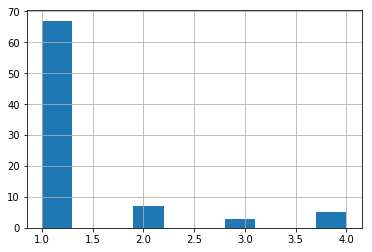

In [24]:
df_train_example["nb_img"].hist()